<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Data%20Preprocessing/Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages
#The general process for ARIMA models is the following:
  *  Visualize the Time Series Data
  * Make the time series data stationary  
  * Plot the Correlation and AutoCorrelation Charts
  * Construct the ARIMA Model or Seasonal ARIMA based on the data
  * Use the model to make predictions



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('Delhi.csv',index_col='Date' )

In [8]:
df.head()

,Temperature
Date,
2009-01-01,14.8
2009-02-01,18.3
2009-03-01,23.5
2009-04-01,29.7
2009-05-01,32.4


In [9]:
df.tail()

,Temperature
Date,
2019-03-01,22.4
2019-04-01,31.0
2019-05-01,33.8
2019-06-01,35.7
2019-07-01,31.8


In [10]:
df.dropna(inplace=True)

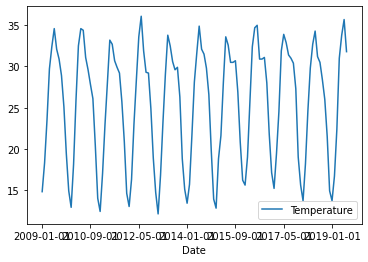

In [11]:
df.plot()

# Testing for Stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
def ad_test(dataset):
     dftest = adfuller(dataset)
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[1] <= 0.05:
        print("Data is stationary")
     else:
        print("Data is non-stationary ")
    
ad_test(df['Temperature'])

1. ADF :  -1.7331044251336358
2. P-Value :  0.41414182197652416
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 113
5. Critical Values :
	 1% :  -3.489589552580676
	 5% :  -2.887477210140433
	 10% :  -2.580604145195395
Data is non-stationary 


## Differencing

In [14]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [15]:
df.head()

,Temperature,Seasonal First Difference
Date,,
2009-01-01,14.8,NaN
2009-02-01,18.3,NaN
2009-03-01,23.5,NaN
2009-04-01,29.7,NaN
2009-05-01,32.4,NaN


In [16]:
ad_test(df['Seasonal First Difference'].dropna())

1. ADF :  -2.8226702453506007
2. P-Value :  0.05510774185780258
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 102
5. Critical Values :
	 1% :  -3.4961490537199116
	 5% :  -2.8903209639580556
	 10% :  -2.5821223452518263
Data is non-stationary 


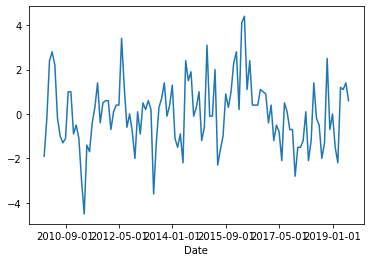

In [17]:
df['Seasonal First Difference'].plot()

In [18]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(12)

In [19]:
df.head()

,Temperature,Seasonal First Difference,Seasonal Second Difference
Date,,,
2009-01-01,14.8,NaN,NaN
2009-02-01,18.3,NaN,NaN
2009-03-01,23.5,NaN,NaN
2009-04-01,29.7,NaN,NaN
2009-05-01,32.4,NaN,NaN


In [20]:
ad_test(df['Seasonal Second Difference'].dropna())

1. ADF :  -3.7777604117543557
2. P-Value :  0.003143229356806359
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 89
5. Critical Values :
	 1% :  -3.506057133647011
	 5% :  -2.8946066061911946
	 10% :  -2.5844100201994697
Data is stationary


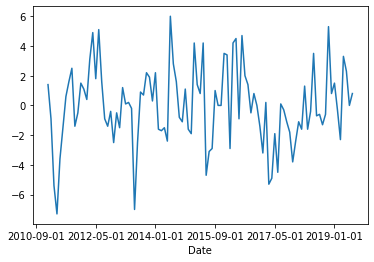

In [21]:
df['Seasonal Second Difference'].plot()